In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%cd ../experiments/vgg_gr_tuning/2021-04-23-14-32/

/Users/samuilstoychev/Desktop/research_project_repo/research_project/experiments/vgg_gr_tuning/2021-04-23-14-32


In [3]:
!ls 

1000_1600_0  1000_800_0   2000_1600_0  2000_800_0   3000_1600_0  3000_800_0
1000_1600_1  1000_800_1   2000_1600_1  2000_800_1   3000_1600_1  3000_800_1
1000_1600_2  1000_800_2   2000_1600_2  2000_800_2   3000_1600_2  3000_800_2
1000_3200_0  2000_12800_0 2000_3200_0  3000_12800_0 3000_3200_0
1000_3200_1  2000_12800_1 2000_3200_1  3000_12800_1 3000_3200_1
1000_3200_2  2000_12800_2 2000_3200_2  3000_12800_2 3000_3200_2


In [4]:
logs = !ls
# VM runs out of memory at g_fc_uni = 12,800
logs = list(filter(lambda x: "12800" not in x, logs))

In [5]:
class Metrics: 
    def __init__(self, logs): 
        self.logs = logs 
        self.raw_metrics = self.calculate_metrics(logs)
        
    def extract_metrics(self, filename): 
        f = open(filename, 'r')
        lines = f.readlines() 
        gpu_usage = None
        gpu_mem = None
        for line in lines: 
            if "=> Average precision" in line: 
                accuracy = float(line.split(" ")[-1])
            if "=> Total training time" in line: 
                training_time = float(line.split(" ")[-2])
            if "GPU BEFORE EVALUATION:" in line: 
                gpu_usage, gpu_mem = eval(line[22:])
        return (accuracy, training_time, gpu_usage, gpu_mem)
    
    def calculate_metrics(self, files): 
        metrics = dict()

        for file in files: 
            iters, g_fc_uni, _ = file.split("_")
            iters = int(iters)
            g_fc_uni = int(g_fc_uni)
            if (iters, g_fc_uni) in metrics: 
                metrics[(iters, g_fc_uni)].append(self.extract_metrics(file))
            else: 
                metrics[(iters, g_fc_uni)] = [self.extract_metrics(file)] 

        return metrics
    
    def get_metrics_df(self): 
        rows = []
        for key in self.raw_metrics: 
            vals = self.raw_metrics[key]
            rows.append([key[0], key[1]] + [np.mean(x) for x in list(zip(*vals))])
        return pd.DataFrame(rows, columns=["iters", "g_fc_uni", "Accuracy", "Training time (s)", "GPU Usage (%)", "GPU Memory (MB)"])
            

In [6]:
metrics = Metrics(logs)
df = metrics.get_metrics_df()
df

,iters,g_fc_uni,Accuracy,Training time (s),GPU Usage (%),GPU Memory (MB)
0,1000,1600,0.745967,897.200000,37.732348,4348.0
1,1000,3200,0.722067,1002.900000,44.128950,8018.0
2,1000,800,0.815800,854.600000,34.138997,2710.0
3,2000,1600,0.703500,1772.266667,38.719702,4348.0
4,2000,3200,0.787500,1999.000000,44.576285,8018.0
5,2000,800,0.747567,1685.400000,34.189341,2710.0
6,3000,1600,0.738700,2642.000000,38.741457,4348.0
7,3000,3200,0.671267,2971.700000,45.779029,8018.0
8,3000,800,0.724067,2542.500000,34.082694,2710.0


# GR: Accuracy

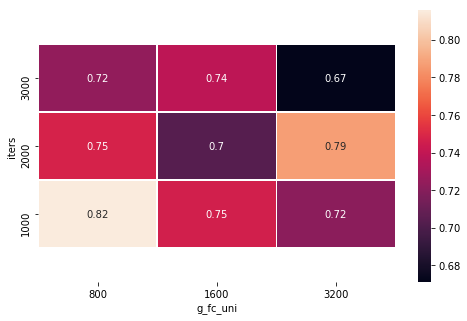

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','g_fc_uni','Accuracy'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

# GR: GPU Memory Consumption (MB)

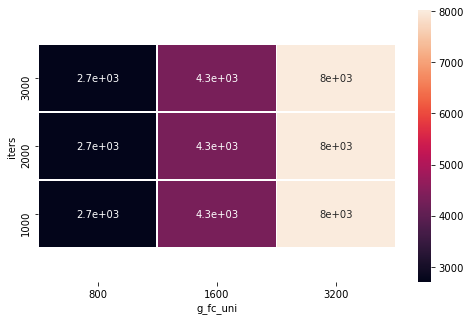

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','g_fc_uni','GPU Memory (MB)'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 

# GR: Average GPU Usage (%)

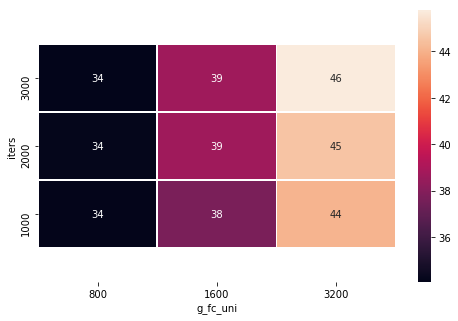

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))         # Sample figsize in inches
sns.heatmap(df.pivot('iters','g_fc_uni','GPU Usage (%)'), annot=True, linewidths=.5, ax=ax)

# Source for the code below: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.invert_yaxis()

plt.show() 